# Advanced Database Management System

## Voice gender data - Gender classification of voice

Voice recognition can be applied to varied applications like home automation, home security, robotics, voice assistant devices like amazon echo, google home, siri, cortana etc. This project is just an introduction to voice recognition as gender classification.

###  Dataset source
https://www.kaggle.com/primaryobjects/voicegender/data

## Data and setup
_____________________________________

***Importing numpy and pandas***

In [1]:
import pandas as pd
pd.set_option('expand_frame_repr', True)
pd.set_option('display.max_columns', None)
import numpy as np

*** Import visualisation libraries ***

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

*** Data Dictionary ***

Each voice sample is a result of acoustic analysis of actual voice sample's using the specan fucntion from the WarbleR package in R. Specan function would translate a voice sample into 22 acoustic parameters out of which 20 are available in our dataset. Each sample is then marked as Male or Female.
These are the 22 acoustic properties being measured in each sample:
1. ***duration:*** length of signal(All observation have same duration of 20 sec, hence not relevant)
2. ***meanfreq:*** mean frequency (in kHz)
3. ***sd:*** standard deviation of frequency
4. ***median:*** median frequency (in kHz)
5. ***Q25:*** first quantile (in kHz)
6. ***Q75:*** third quantile (in kHz)
7. ***IQR:*** interquantile range (in kHz)
8. ***skew:*** skewness 
9. ***kurt:*** kurtosis 
10. ***sp.ent:*** spectral entropy
11. ***sfm:*** spectral flatness
12. ***mode:*** mode frequency
13. ***centroid:*** frequency centroid
14. ***peakf:*** peak frequency (frequency with highest energy)(All observation have same peak frequency of 0 Hz, hence not relevant)
15. ***meanfun:*** average of fundamental frequency measured across acoustic signal
16. ***minfun:*** minimum fundamental frequency measured across acoustic signal
17. ***maxfun:*** maximum fundamental frequency measured across acoustic signal
18. ***meandom:*** average of dominant frequency measured across acoustic signal
19. ***mindom:*** minimum of dominant frequency measured across acoustic signal
20. ***maxdom:*** maximum of dominant frequency measured across acoustic signal
21. ***dfrange:*** range of dominant frequency measured across acoustic signal
22. ***modindx:*** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range


***Import CSV data into Pandas dataframes***

In [3]:
voice_df = pd.read_csv('voice.csv')

***Check Variable datatypes***

In [4]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


No Missing data.
All columns are numeric

In [5]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
voice_df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

No data missing in the dataframe.

### Exploratory Data Analysis

C:\Users\ranib\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Male mean frequency:  0.17081349003950747  KHz
95% male population has mean frequency between:  0.11052457657775186  and  0.2070091205032636  KHz
100% male population has mean frequency between:  0.0393633425835608  and  0.225582197675746  KHz
Female mean frequency:  0.19099973070217632  KHz
95% female population has mean frequency between:  0.11621742597540978  and  0.23745079755642168  KHz
100% female population has mean frequency between:  0.0788471871713806  and  0.251123758720282  KHz


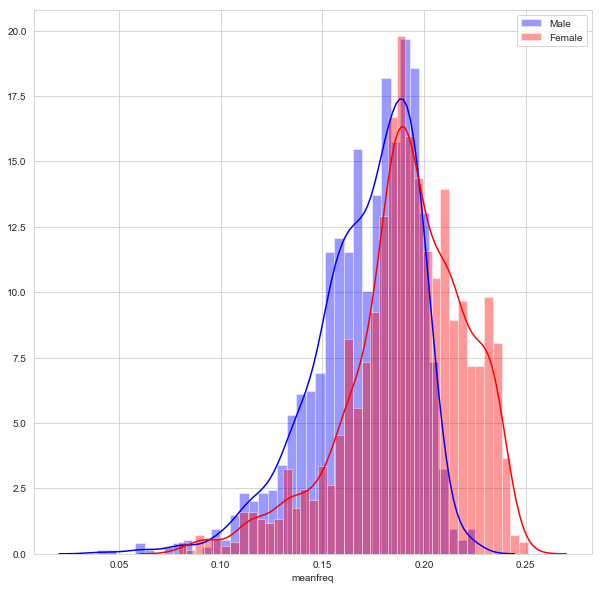

In [8]:
plt.figure(figsize=(10,10))
sns.distplot(voice_df[voice_df['label'] == 'male']['meanfreq'], color='blue', label='Male', bins = 40, )
sns.distplot(voice_df[voice_df['label'] == 'female']['meanfreq'], color='red', label='Female', bins = 40)
plt.legend()
print('Male mean frequency: ', voice_df[voice_df['label'] == 'male']['meanfreq'].mean(), ' KHz')
m_low, m_high = voice_df[voice_df['label'] == 'male']['meanfreq'].quantile([0.025,0.975])
print('95% male population has mean frequency between: ', m_low, ' and ', m_high,' KHz')
print('100% male population has mean frequency between: ', voice_df[voice_df['label'] == 'male']['meanfreq'].min(),\
      ' and ', voice_df[voice_df['label'] == 'male']['meanfreq'].max(),' KHz')
print('Female mean frequency: ', voice_df[voice_df['label'] == 'female']['meanfreq'].mean(), ' KHz')
f_low, f_high = voice_df[voice_df['label'] == 'female']['meanfreq'].quantile([0.025,0.975])
print('95% female population has mean frequency between: ', f_low, ' and ', f_high,' KHz')
print('100% female population has mean frequency between: ', voice_df[voice_df['label'] == 'female']['meanfreq'].min(),\
      ' and ', voice_df[voice_df['label'] == 'female']['meanfreq'].max(),' KHz')

Clearly, the male mean frequency distribution is left skewed while female distribution is right skewed. since the mean value of both distribution is close, we can say than Female population voice has frequencies in the higher range than male voice.

Male mean fundamental frequency:  0.11587163938708586  KHz
95% male population has mean fundamental frequency between:  0.07893240381356875  and  0.14419636574897793  KHz
100% male population has mean fundamental frequency between:  0.0555653493134555  and  0.179050677697413  KHz
Female mean fundamental frequency:  0.16974182917136693  KHz
95% female fundamental population has mean frequency between:  0.13540700263961616  and  0.2058108014212306  KHz
100% female population has mean fundamental frequency between:  0.0919118518043564  and  0.237636387269209  KHz


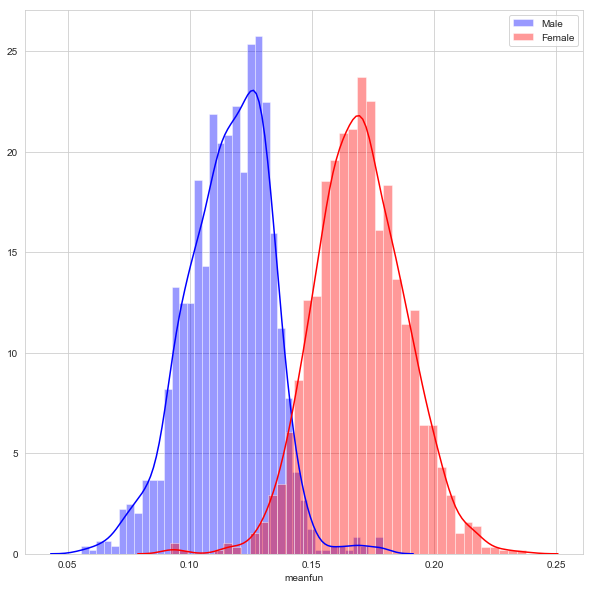

In [9]:
plt.figure(figsize=(10,10))
sns.distplot(voice_df[voice_df['label'] == 'male']['meanfun'], color='blue', label='Male', bins = 40, )
sns.distplot(voice_df[voice_df['label'] == 'female']['meanfun'], color='red', label='Female', bins = 40)
plt.legend()
print('Male mean fundamental frequency: ', voice_df[voice_df['label'] == 'male']['meanfun'].mean(), ' KHz')
m_low, m_high = voice_df[voice_df['label'] == 'male']['meanfun'].quantile([0.025,0.975])
print('95% male population has mean fundamental frequency between: ', m_low, ' and ', m_high,' KHz')
print('100% male population has mean fundamental frequency between: ', voice_df[voice_df['label'] == 'male']['meanfun'].min(),\
      ' and ', voice_df[voice_df['label'] == 'male']['meanfun'].max(),' KHz')
print('Female mean fundamental frequency: ', voice_df[voice_df['label'] == 'female']['meanfun'].mean(), ' KHz')
f_low, f_high = voice_df[voice_df['label'] == 'female']['meanfun'].quantile([0.025,0.975])
print('95% female fundamental population has mean frequency between: ', f_low, ' and ', f_high,' KHz')
print('100% female population has mean fundamental frequency between: ', voice_df[voice_df['label'] == 'female']['meanfun'].min(),\
      ' and ', voice_df[voice_df['label'] == 'female']['meanfun'].max(),' KHz')

Since 95% of Male population has fundamental frequency between 0.07 and 0.14, while female fundamental frequency is between 0.13 to 0.20. fundamental frequency seems to be a far better predictor of gender than mean frequnecy.

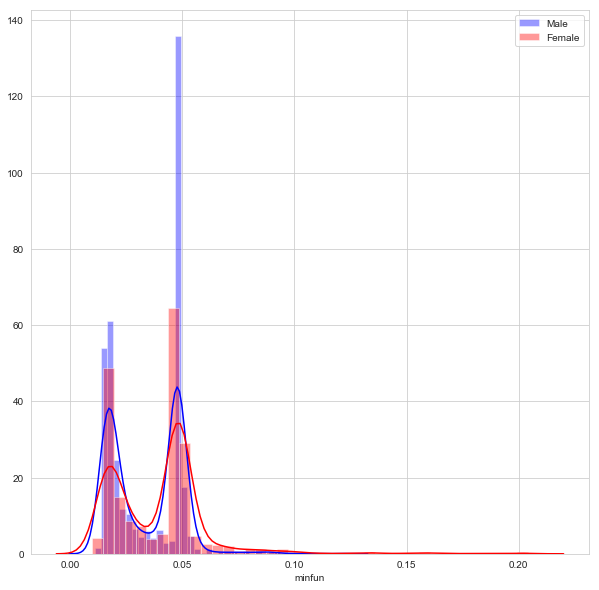

In [10]:
plt.figure(figsize=(10,10))
sns.distplot(voice_df[voice_df['label'] == 'male']['minfun'], color='blue', label='Male', bins = 40, )
sns.distplot(voice_df[voice_df['label'] == 'female']['minfun'], color='red', label='Female', bins = 40)
plt.legend()

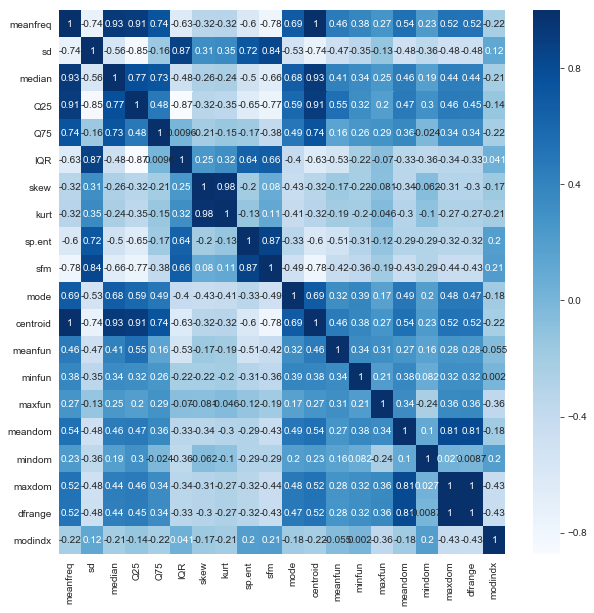

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(voice_df.corr(), annot=True, cmap= 'Blues')


We see a lot of correlated predictors, which can be helpful in reducing the number pf predictors and complexity of our prediction model.
maxdom and dfrange are 100% coorelated 
Centroid and mean frequency are 100% correlated
Kurt and skew are 98% correlated

** Getting dummy values for the label to be fed into our machine learning models **

In [12]:
male = pd.get_dummies(voice_df['label'], drop_first=True)

In [13]:
voice_df = pd.concat([voice_df, male], axis=1)

In [14]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1


In [15]:
voice_df.drop('label', axis=1, inplace=True)

In [16]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [17]:
X = voice_df.drop('male', axis=1)
X_labels= X.columns
y = voice_df['male']

## Standardising all components

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X_labels
X_scaled.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


## Perform principal component analysis

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

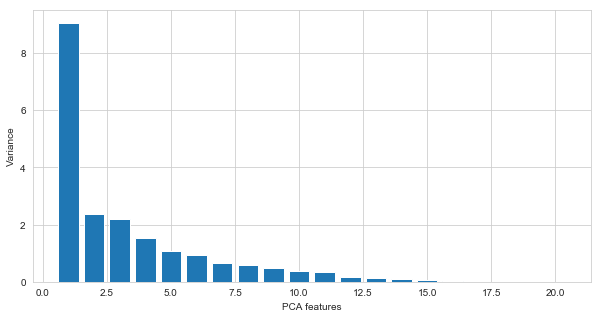

In [20]:
plt.figure(figsize=(10,5))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.ylabel('Variance')
plt.xlabel('PCA features')
plt.show()

In [21]:
cumulative_variance_per = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100)
cumulative_variance_per.columns = ['Cumulative variance per']
cumulative_variance_per.index = range(1, len(cumulative_variance_per) + 1)
print(cumulative_variance_per)

    Cumulative variance per
1                 45.216391
2                 57.087000
3                 67.996939
4                 75.616702
5                 80.910640
6                 85.525606
7                 88.730089
8                 91.628482
9                 94.080209
10                95.955726
11                97.611632
12                98.507475
13                99.197766
14                99.666813
15                99.895725
16                99.960278
17               100.000000
18               100.000000
19               100.000000
20               100.000000


Clearly, 90% of the variance is covered by 8 components. We can consider an intrinsic dimension of 8. But since we have only 20 components, we can exclude PCA and use all components instead.

** Fitting our Data to 8 components **

In [22]:
pca = PCA(n_components=8)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
X_PCA = pd.DataFrame(pca.transform(X_scaled))
X_PCA.head(5)

,0,1,2,3,4,5,6,7
0,8.208516,2.164488,1.959784,5.452417,0.930851,-1.202176,-1.239370,-1.555728
1,8.671892,3.854627,4.107208,5.079575,0.411480,-0.120161,-0.880189,-0.899986
2,9.111169,4.519140,7.528252,3.464543,-0.049165,1.219385,-0.268173,-0.187280
3,4.109261,-0.562341,-1.253138,-0.667666,0.003349,-0.965539,-0.348339,0.193231
4,4.057255,-2.272709,-0.576060,0.962292,-0.183624,-0.493363,0.411477,0.250032


## Logistic regression

### Performing logistic regression on unscaled data

** Splitting data into training and testing data **

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Choosing best C value parameter**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [26]:
param_C= [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for C in param_C:
    logRegModel = LogisticRegression(C=C)
    logRegModel.fit(X_train, y_train)
    probs = logRegModel.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("C:", C, "    AUC:", roc_auc)

C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C: 0.0001     AUC: 0.8908271638241966
C: 0.001     AUC: 0.9615442256391811
C: 0.01     AUC: 0.9951842859854729
C: 0.1     AUC: 0.9962833078560082
C: 1     AUC: 0.9964531566905455
C: 10     AUC: 0.996533085553857
C: 100     AUC: 0.9965330855538571
C: 1000     AUC: 0.9965330855538571
C: 10000     AUC: 0.9965330855538571


C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Since AUC seems to be unaffected after C=0.1, we can assume C=0.1 as our ideal C value.

** Training and fitting a logistic regression on model on our training data **

In [27]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.1)
logRegModel.fit(X_train, y_train)

C:\Users\ranib\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

** Predicting values for our testing data **

In [28]:
predictions = logRegModel.predict(X_test)
probs = logRegModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

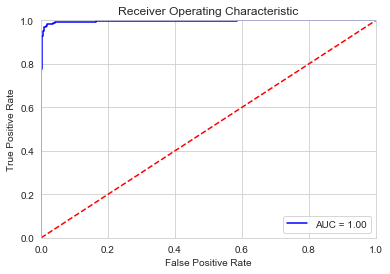

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Evaluate model accuracy **

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[292   5]
 [  7 330]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.99      0.98      0.98       337

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



** Logistic regression model accuracy with test Data: 98% **

# K-Nearest Neighbors

** Since knn algorithms depends on a distance functions for classification and different predictors are measured in different scales, we will work with predictor variables after standardization**

** Training and fitting a KNN model on our training data **

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knnModel = KNeighborsClassifier(n_neighbors=1)

In [34]:
knnModel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

** Predicting values for our testing data **

In [35]:
predictions = knnModel.predict(X_test)

** Evaluate model accuracy **

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[290   7]
 [  8 329]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       297
           1       0.98      0.98      0.98       337

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



*** KNN model accuracy: 98% with K value = 1***

** KNN model accuracy depends on its k value, lets try fitting this model for other k values and compare the accuracy**

Lets fit this model for knn between 1-40 and plot the prediction error rate. we can aslo plot the precision but since already the precison is 98% it will be difficult to visually analyse any closer values 

In [38]:
errorRate = []
for i in range(1,40):
    knnModel_i = KNeighborsClassifier(n_neighbors=i)
    knnModel_i.fit(X_train, y_train)
    predictions_i = knnModel_i.predict(X_test)
    errorRate.append(np.mean(predictions_i != y_test))

Lets plot the error rate against k value

Text(0, 0.5, 'Error Rate')

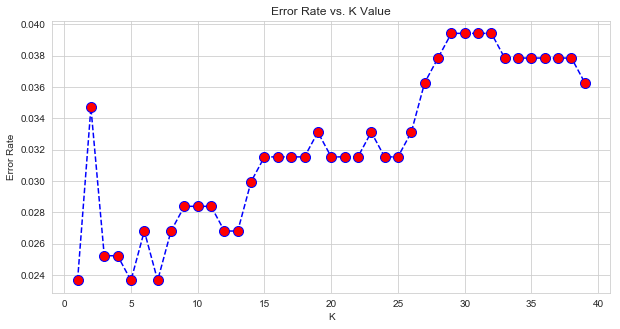

In [39]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),errorRate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Clearly error rate seems to be least for k value = 3 or 4

** Lets train our model considering the best K value to be 3**

In [40]:
knnModel3 = KNeighborsClassifier(n_neighbors=3)
knnModel3.fit(X_train, y_train)
predictions3 = knnModel3.predict(X_test)

In [41]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[290   7]
 [  8 329]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       297
           1       0.98      0.98      0.98       337

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**We get almost similar results for K=1 and k=3 with a marginal increase in predicting females**

## Decision tree

** Training and fitting a Decision tree model on our training data **

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [43]:
dtModel = DecisionTreeClassifier()
dt_param = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
dtRandom = RandomizedSearchCV(dtModel, dt_param, cv=5)

In [44]:
dtRandom.fit(X_train, y_train)
dtRandom.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 2}

** Predicting values for our testing data **

In [45]:
predictions = dtRandom.predict(X_test)

** Evaluate model accuracy **

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[288   9]
 [ 19 318]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       297
           1       0.97      0.94      0.96       337

   micro avg       0.96      0.96      0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



#### ** Decision tree model accuracy: 94%**

*** Lets try if random forest can help increase the accuracy to match or beat KNN ***

## Random forest

** Training and fitting a Random forest model on our training data **

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
rfcModel = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfcModel, param_distributions = random_param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [51]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

** Predicting values for our testing data **

In [52]:
predictions = rf_random.predict(X_test)

** Evaluate model accuracy **

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[295   2]
 [  8 329]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.99       337

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



*** Definetely random forest model is more preicise than a decision tree***

## Support vector machines

** Training and fitting a SVM model on our training data **

In [55]:
from sklearn.svm import SVC

In [56]:
svmModel = SVC()

In [57]:
svmModel.fit(X_train, y_train)

C:\Users\ranib\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

** Predicting values for our testing data **

In [58]:
predictions = svmModel.predict(X_test)

** Evaluate model accuracy **

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print("Confusion matrix: \n", confusion_matrix(y_test, predictions))
print("\n classification_report: \n", classification_report(y_test, predictions))

Confusion matrix: 
 [[293   4]
 [  7 330]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**Lets train our SVM model again with the best values for C and gamma parameters. Grid search will us decide the best parameters to use to make we have the right bias variance and our model is not overfitting or underfitting.**

In [61]:
from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

*** Creating a param dictionary with a set of C and gamma value to be tested for our grid search.***

In [ ]:
param = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(SVC(), param_grid=param, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

*** Here are the param to best fit our model ***

In [ ]:
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(y_test, grid_predictions)

In [ ]:
print(classification_report(y_test, grid_predictions))

## Summary

Applying different classification model to our dataset resulted in similar efficiency and accuracy. Lets apply our trained models with tuned hyperparameters  on the validation datasets and measure the accuracy score. This will help us decide which model to choose.

In [ ]:
from sklearn.metrics import accuracy_score
validation_result_list = []
logRegTestPred = logRegModel.predict(X_test)
logRegValPred = logRegModel.predict(X_val)
validation_result_list.append({'Model':'Logistic Regression','Test Accuracy' : accuracy_score(y_test, logRegTestPred, normalize=True), 'Validation Accuracy': accuracy_score(y_val, logRegValPred, normalize=True)})
knnTestPred = knnModel3.predict(X_test)
knnValPred = knnModel3.predict(X_val)
validation_result_list.append({'Model':'K-Nearest neighbor', 'Test Accuracy' : accuracy_score(y_test, knnTestPred, normalize=True), 'Validation Accuracy': accuracy_score(y_val, knnValPred, normalize=True)})
decTreeTestPred = dtRandom.predict(X_test)
decTreeValPred = dtRandom.predict(X_val)
validation_result_list.append({'Model':'Decision tree', 'Test Accuracy' : accuracy_score(y_test, decTreeTestPred, normalize=True), 'Validation Accuracy': accuracy_score(y_val, decTreeValPred, normalize=True)})
randForestTestPred = rf_random.predict(X_test)
randForestValPred = rf_random.predict(X_val)
validation_result_list.append({'Model':'Random forest', 'Test Accuracy' : accuracy_score(y_test, randForestTestPred, normalize=True), 'Validation Accuracy': accuracy_score(y_val, randForestValPred, normalize=True)})
svmTestPred = grid.predict(X_test)
svmValPred = grid.predict(X_val)
validation_result_list.append({'Model':'SVM', 'Test Accuracy' : accuracy_score(y_test, svmTestPred, normalize=True), 'Validation Accuracy': accuracy_score(y_val, svmValPred, normalize=True)})
validation_result = pd.DataFrame(validation_result_list)
validation_result

Since SVM performed better in both test and validation, SVM would be our ideal choice for this project.